###Proceso de ETL Para los precios de los medicamentos

NOTA: Ejecutar el sigueinte codigo solo si se esta en el entorno de google Colab

In [ ]:
!git clone https://github.com/njacob1001/etl-project.git
# Cambiar al directorio del proyecto
%cd 'etl-project'

Este bloque de código configura el sistema de logs para registrar las etapas clave del proceso ETL (Extracción, Transformación y Carga). Primero, se asegura de que exista una carpeta para los registros de logs. Luego, se configura el archivo de log donde se almacenarán los mensajes.

El propósito de este código es proporcionar visibilidad en cada etapa del pipeline y permitir el seguimiento de cualquier error o progreso dentro del proceso de carga y procesamiento de datos.

In [ ]:
import os
import pandas as pd

# Crear carpeta de logs si no existe
log_dir = os.path.join(os.getcwd(), 'logs')
os.makedirs(log_dir, exist_ok=True)  # Crear la carpeta si no existe

# Ruta al archivo de log
log_file_path = os.path.join(log_dir, 'etl_logs.txt')

# Método alternativo para escribir en el log
def write_to_log(message):
    with open(log_file_path, 'a') as file:
        file.write(message + "\n")

write_to_log("Iniciando el proceso ETL.")


###Extraccion de los datos

Este bloque de código se encarga de cargar tres datasets en formato CSV. Los archivos contienen información sobre los precios de los medicamentos, los cuales se leen utilizando la función **`read_csv`** de **pandas**. A continuación, se visualizan las primeras filas de cada dataset para revisar su estructura y asegurar que los datos se hayan cargado correctamente.

- **Primer Dataset**: Carga el archivo **1.csv**.
- **Segundo Dataset**: Carga el archivo **2.csv**.
- **Tercer Dataset**: Carga el archivo **15.csv**.


In [20]:
# Registrar inicio del proceso ETL
write_to_log("Iniciando el proceso de carga de los datasets.")
src_dir = os.path.join(os.getcwd(), 'data')

# Cargar los tres datasets
try:
    df1 = pd.read_csv(os.path.join(src_dir, '1.csv'))  # Primer dataset
    write_to_log("Dataset 1 cargado correctamente.")
except Exception as e:
    write_to_log(f"Error al cargar el Dataset 1: {e}")

try:
    df2 = pd.read_csv(os.path.join(src_dir, '2.csv'))  # Segundo dataset
    write_to_log("Dataset 2 cargado correctamente.")
except Exception as e:
    write_to_log(f"Error al cargar el Dataset 2: {e}")

try:
    df3 = pd.read_csv(os.path.join(src_dir, '15.csv'))  # Tercer dataset
    write_to_log("Dataset 3 cargado correctamente.")
except Exception as e:
    write_to_log(f"Error al cargar el Dataset 3: {e}")

# Ver las primeras filas de cada dataset para entender su estructura
write_to_log("Visualizando las primeras filas de los datasets.")
print(df1.head())  # Muestra las primeras filas del primer dataset
write_to_log("Primeras filas del Dataset 1 visualizadas.")

print("________________________________")
print(df2.head())  # Muestra las primeras filas del segundo dataset
write_to_log("Primeras filas del Dataset 2 visualizadas.")

print("________________________________")
print(df3.head())  # Muestra las primeras filas del tercer dataset
write_to_log("Primeras filas del Dataset 3 visualizadas.")



  principio_activo unidad_de_dispensacion              concentracion  \
0        Midazolam                Ampolla            Midazolam 15 mg   
1  Acido Valproico                Tableta  Divalproato Sodico 500 mg   
2  Acido Valproico                Tableta  Divalproato Sodico 500 mg   
3       Fluoxetina                Capsula           Fluoxetina 20 mg   
4   Proximetacaina                 Frasco        Proximetacaina 5 mg   

  unidad_base nombre_comercial fabricante  precio_por_tableta factoresprecio  \
0          ml         Dormicum  Siegfried        11199.800000           Alto   
1          mg          Valcote  Lafrancol         3752.866667          Medio   
2          mg          Valcote  Lafrancol         1777.266522          Medio   
3          mg       Fluoxetina     Genfar          329.295281          Medio   
4          ml          Alcaine      Alcon        64184.745760          Medio   

   numerofactor  
0             3  
1             2  
2             2  
3             


Este bloque de código se encarga de mostrar las columnas de los tres datasets cargados previamente en el pipeline ETL. Las columnas de cada dataset son importantes porque nos permiten entender cómo están estructurados los datos y verificar si contienen la información que esperamos.

- **Dataset 1**: Se visualizan las columnas del primer dataset cargado (`df1`).
- **Dataset 2**: Se visualizan las columnas del segundo dataset cargado (`df2`).
- **Dataset 3**: Se visualizan las columnas del tercer dataset cargado (`df3`).

In [25]:
# Ver las columnas de cada dataset
# Aquí se visualizan las columnas de los tres datasets cargados para entender su estructura.

# Agregar un registro al log
write_to_log("Visualizando las columnas del Dataset 1.")
print("_______________Datset 1_________________")
print(df1.columns)

# Agregar un registro al log
write_to_log("Visualizando las columnas del Dataset 2.")
print("_______________Dataset 2________________")
print(df2.columns)

# Agregar un registro al log
write_to_log("Visualizando las columnas del Dataset 3.")
print("_______________Dataset 15_______________")
print(df3.columns)


_______________Datset 1_________________
Index(['principio_activo', 'unidad_de_dispensacion', 'concentracion',
       'unidad_base', 'nombre_comercial', 'fabricante', 'precio_por_tableta',
       'factoresprecio', 'numerofactor'],
      dtype='object')
_______________Dataset 2________________
Index(['Expediente_INVIMA', 'principio_activo', 'concentracion', 'unidad_base',
       'unidad_de_dispensacion', 'nombre_comercial', 'fabricante',
       'medicamento', 'canal', 'precio_por_tableta', 'factoresprecio',
       'numerofactor'],
      dtype='object')
_______________Dataset 15_______________
Index(['principio_activo', 'unidad_de_dispensacion', 'concentracion',
       'unidad_base', 'nombre_comercial', 'fabricante', 'precio_por_tableta',
       'factoresprecio', 'numerofactor'],
      dtype='object')


Este bloque de código renombra las columnas de tres datasets para asegurarse de que los nombres de las columnas sean consistentes a lo largo del pipeline ETL.

- **Dataset 1**: Se renombrarán las columnas de acuerdo con un formato consistente.
- **Dataset 2**: Se renombrarán las columnas para que coincidan con las del primer dataset, con la adición de algunas columnas adicionales como **`medicamento`** y **`canal`**.
- **Dataset 15**: Se renombrarán las columnas de manera similar a los otros datasets.


In [26]:
# Renombrar columnas en Dataset 1
# Aquí se renombrarán las columnas del primer dataset para asegurar que tengan nombres consistentes.

write_to_log("Renombrando columnas en el Dataset 1.")
df1.rename(columns={
    'principio_activo': 'principio_activo',
    'unidad_de_dispensacion': 'unidad_de_dispensacion',
    'concentracion': 'concentracion',
    'unidad_base': 'unidad_base',
    'nombre_comercial': 'nombre_comercial',
    'fabricante': 'fabricante',
    'precio_por_tableta': 'precio_por_tableta',
    'factoresprecio': 'factoresprecio',
    'numerofactor': 'numerofactor'
}, inplace=True)

# Renombrar columnas en Dataset 2
# Aseguramos que las columnas en el segundo dataset también tengan los nombres consistentes con el primero.

write_to_log("Renombrando columnas en el Dataset 2.")
df2.rename(columns={
    'principio_activo': 'principio_activo',
    'unidad_de_dispensacion': 'unidad_de_dispensacion',
    'concentracion': 'concentracion',
    'unidad_base': 'unidad_base',
    'nombre_comercial': 'nombre_comercial',
    'fabricante': 'fabricante',
    'precio_por_tableta': 'precio_por_tableta',
    'factoresprecio': 'factoresprecio',
    'numerofactor': 'numerofactor',
    'medicamento': 'medicamento',  # Si necesitas crear una columna adicional, hacerlo
    'canal': 'canal',
    'Expediente_INVIMA': 'Expediente_INVIMA'
}, inplace=True)

# Renombrar columnas en Dataset 15
# Finalmente, renombramos las columnas del tercer dataset (Dataset 15) para que tengan la misma estructura.

write_to_log("Renombrando columnas en el Dataset 15.")
df3.rename(columns={
    'principio_activo': 'principio_activo',
    'unidad_de_dispensacion': 'unidad_de_dispensacion',
    'concentracion': 'concentracion',
    'unidad_base': 'unidad_base',
    'nombre_comercial': 'nombre_comercial',
    'fabricante': 'fabricante',
    'precio_por_tableta': 'precio_por_tableta',
    'factoresprecio': 'factoresprecio',
    'numerofactor': 'numerofactor'
}, inplace=True)

# Verificar que los nombres de las columnas sean consistentes ahora
# Se imprimen las columnas para asegurarnos de que todas se han renombrado correctamente.

write_to_log("Verificando los nombres de las columnas después de renombrar.")
print("Dataset 1 columnas después de renombrar: ", df1.columns)
print("Dataset 2 columnas después de renombrar: ", df2.columns)
print("Dataset 15 columnas después de renombrar: ", df3.columns)



Dataset 1 columnas después de renombrar:  Index(['principio_activo', 'unidad_de_dispensacion', 'concentracion',
       'unidad_base', 'nombre_comercial', 'fabricante', 'precio_por_tableta',
       'factoresprecio', 'numerofactor'],
      dtype='object')
Dataset 2 columnas después de renombrar:  Index(['Expediente_INVIMA', 'principio_activo', 'concentracion', 'unidad_base',
       'unidad_de_dispensacion', 'nombre_comercial', 'fabricante',
       'medicamento', 'canal', 'precio_por_tableta', 'factoresprecio',
       'numerofactor'],
      dtype='object')
Dataset 15 columnas después de renombrar:  Index(['principio_activo', 'unidad_de_dispensacion', 'concentracion',
       'unidad_base', 'nombre_comercial', 'fabricante', 'precio_por_tableta',
       'factoresprecio', 'numerofactor'],
      dtype='object')


En este bloque de código, aseguramos que la columna **`precio_por_tableta`** en cada dataset se convierta al tipo de datos numérico correcto, es decir, tipo **`float`**. Este paso es importante porque, en ocasiones, los archivos CSV pueden contener valores no numéricos (como cadenas de texto o símbolos) que necesitan ser convertidos a **NaN** para evitar errores en análisis posteriores.

Después de la conversión, se verifican los tipos de datos para asegurarse de que la conversión se ha realizado correctamente.



In [27]:
# Asegurarse de que las columnas numéricas son del tipo correcto (float)
# Convertimos las columnas 'precio_por_tableta' a tipo numérico, convirtiendo cualquier valor no numérico a NaN

write_to_log("Asegurando que la columna 'precio_por_tableta' sea del tipo numérico en el Dataset 1.")
df1['precio_por_tableta'] = pd.to_numeric(df1['precio_por_tableta'], errors='coerce')

write_to_log("Asegurando que la columna 'precio_por_tableta' sea del tipo numérico en el Dataset 2.")
df2['precio_por_tableta'] = pd.to_numeric(df2['precio_por_tableta'], errors='coerce')

write_to_log("Asegurando que la columna 'precio_por_tableta' sea del tipo numérico en el Dataset 3.")
df3['precio_por_tableta'] = pd.to_numeric(df3['precio_por_tableta'], errors='coerce')

# Verificar los tipos de datos después de la conversión
# Mostramos los tipos de datos de las columnas para asegurarnos de que la conversión se ha realizado correctamente.

write_to_log("Verificando los tipos de datos después de la conversión.")
print(df1.dtypes)
print(df2.dtypes)
print(df3.dtypes)



principio_activo           object
unidad_de_dispensacion     object
concentracion              object
unidad_base                object
nombre_comercial           object
fabricante                 object
precio_por_tableta        float64
factoresprecio             object
numerofactor                int64
dtype: object
Expediente_INVIMA           int64
principio_activo           object
concentracion              object
unidad_base                object
unidad_de_dispensacion     object
nombre_comercial           object
fabricante                 object
medicamento                object
canal                      object
precio_por_tableta        float64
factoresprecio             object
numerofactor                int64
dtype: object
principio_activo           object
unidad_de_dispensacion     object
concentracion              object
unidad_base                object
nombre_comercial           object
fabricante                 object
precio_por_tableta        float64
factoresprecio      

En este bloque de código, verificamos si hay valores nulos (**NaN**) en las columnas de cada dataset después de haber realizado las conversiones a tipo numérico.



In [28]:
# Verificar si hay valores nulos después de la conversión
# Este bloque de código verifica si hay valores nulos en las columnas de cada dataset

write_to_log("Verificando si hay valores nulos en el Dataset 1 después de la conversión.")
print(df1.isnull().sum())

write_to_log("Verificando si hay valores nulos en el Dataset 2 después de la conversión.")
print(df2.isnull().sum())

write_to_log("Verificando si hay valores nulos en el Dataset 3 después de la conversión.")
print(df3.isnull().sum())


principio_activo          0
unidad_de_dispensacion    0
concentracion             0
unidad_base               0
nombre_comercial          0
fabricante                0
precio_por_tableta        0
factoresprecio            0
numerofactor              0
dtype: int64
Expediente_INVIMA         0
principio_activo          0
concentracion             0
unidad_base               0
unidad_de_dispensacion    0
nombre_comercial          0
fabricante                0
medicamento               0
canal                     0
precio_por_tableta        0
factoresprecio            0
numerofactor              0
dtype: int64
principio_activo          0
unidad_de_dispensacion    0
concentracion             0
unidad_base               0
nombre_comercial          0
fabricante                0
precio_por_tableta        0
factoresprecio            0
numerofactor              0
dtype: int64


En este bloque de código, verificamos si existen filas duplicadas en cada uno de los tres datasets.

In [29]:
# Verificar duplicados exactos
# Este bloque de código verifica si existen filas duplicadas en cada dataset.

write_to_log("Verificando duplicados exactos en el Dataset 1.")
print(df1.duplicated().sum())

write_to_log("Verificando duplicados exactos en el Dataset 2.")
print(df2.duplicated().sum())

write_to_log("Verificando duplicados exactos en el Dataset 3.")
print(df3.duplicated().sum())



126
0
126



En este bloque de código, eliminamos las filas duplicadas en los datasets **`df1`** y **`df3`**, puesto que se identificaron 126 duplicados en cada uno de ellos.

- **Dataset 1**: Se eliminan las filas duplicadas en el primer dataset utilizando **`drop_duplicates()`**.
- **Dataset 3**: Se eliminan las filas duplicadas en el tercer dataset utilizando **`drop_duplicates()`**.

Después de eliminar los duplicados, se verifica si la eliminación fue exitosa al contar nuevamente los duplicados. El número de duplicados restantes debería ser 0.


In [30]:
# Eliminar duplicados en df1 y df3
# Este bloque de código elimina las filas duplicadas de los datasets df1 y df3.

write_to_log("Eliminando duplicados en el Dataset 1.")
df1 = df1.drop_duplicates()

write_to_log("Eliminando duplicados en el Dataset 3.")
df3 = df3.drop_duplicates()

# Verificar si se eliminaron los duplicados
# Comprobamos que los duplicados hayan sido eliminados correctamente.

write_to_log("Verificando si se eliminaron los duplicados en el Dataset 1.")
print(df1.duplicated().sum())  # Debe mostrar 0

write_to_log("Verificando si se eliminaron los duplicados en el Dataset 3.")
print(df3.duplicated().sum())  # Debe mostrar 0


0
0


En este bloque de código, verificamos si existen duplicados exactos en cada uno de los tres datasets después de la eliminación de duplicados.


In [31]:
# Verificar duplicados exactos
# Este bloque de código verifica si existen filas duplicadas en cada dataset después de eliminar duplicados previos.

write_to_log("Verificando duplicados exactos en el Dataset 1 después de la eliminación.")
print(df1.duplicated().sum())

write_to_log("Verificando duplicados exactos en el Dataset 2 después de la eliminación.")
print(df2.duplicated().sum())

write_to_log("Verificando duplicados exactos en el Dataset 3 después de la eliminación.")
print(df3.duplicated().sum())


0
0
0



En este bloque de código, imprimimos la cantidad de registros (filas) en cada uno de los tres datasets.


In [32]:
# Imprimir la cantidad de registros (filas) de cada dataset
# Este bloque de código imprime la cantidad de registros en cada uno de los tres datasets.

write_to_log("Imprimiendo la cantidad de registros en el Dataset 1.")
print("Cantidad de registros en Dataset 1: ", df1.shape[0])

write_to_log("Imprimiendo la cantidad de registros en el Dataset 2.")
print("Cantidad de registros en Dataset 2: ", df2.shape[0])

write_to_log("Imprimiendo la cantidad de registros en el Dataset 15.")
print("Cantidad de registros en Dataset 15: ", df3.shape[0])



Cantidad de registros en Dataset 1:  12408
Cantidad de registros en Dataset 2:  12534
Cantidad de registros en Dataset 15:  12408


En este bloque de código, verificamos si existen filas duplicadas en cada uno de los tres datasets basándonos en un conjunto específico de columnas clave. Esto es importante para asegurarnos de que los datos sean únicos y no contengan entradas repetidas que podrían distorsionar los resultados del análisis posterior.


In [33]:
# Verificar duplicados basados en 'principio_activo', 'concentracion' y 'precio_por_tableta' en df1
# Este bloque de código verifica si existen duplicados basados en ciertas columnas clave en el primer dataset.

write_to_log("Verificando duplicados basados en 'principio_activo', 'concentracion' y 'precio_por_tableta' en el Dataset 1.")
print(df1[['principio_activo', 'unidad_de_dispensacion', 'concentracion', 'unidad_base', 'nombre_comercial', 'fabricante', 'precio_por_tableta', 'factoresprecio']].duplicated().sum())

# Verificar duplicados basados en 'principio_activo', 'concentracion' y 'precio_por_tableta' en df3
# Verificación de duplicados en el tercer dataset (df3).

write_to_log("Verificando duplicados basados en 'principio_activo', 'concentracion' y 'precio_por_tableta' en el Dataset 3.")
print(df3[['principio_activo', 'unidad_de_dispensacion', 'concentracion', 'unidad_base', 'nombre_comercial', 'fabricante', 'precio_por_tableta', 'factoresprecio']].duplicated().sum())

# Verificar duplicados basados en 'principio_activo', 'concentracion' y 'precio_por_tableta' en df2
# Verificación de duplicados en el segundo dataset (df2).

write_to_log("Verificando duplicados basados en 'principio_activo', 'concentracion' y 'precio_por_tableta' en el Dataset 2.")
print(df2[['principio_activo', 'unidad_de_dispensacion', 'concentracion', 'unidad_base', 'nombre_comercial', 'fabricante', 'precio_por_tableta', 'factoresprecio', 'medicamento', 'canal', 'Expediente_INVIMA']].duplicated().sum())


0
0
0


En este bloque de código, unimos los datasets **`df1`** y **`df3`** utilizando las claves especificadas: **`'principio_activo'`, `'concentracion'`** y **`'precio_por_tableta'**, entre otras. La combinación se realiza utilizando una operación de tipo **`outer join`** para asegurarnos de que todas las filas de ambos datasets se incluyan, incluso si no hay coincidencia exacta entre ellos.

- **`df1`** y **`df15`** se combinan usando las claves comunes especificadas en el código.
- Después de la unión, se imprime la cantidad de registros del dataset combinado para asegurarnos de que el proceso se haya completado correctamente.


In [34]:
# Unir df1 y df3 por las claves 'principio_activo', 'concentracion', 'precio_por_tableta'
# En este bloque de código, estamos combinando los datasets df1 y df3 usando las columnas clave especificadas.
# Utilizamos una combinación de tipo 'outer' para asegurar que se incluyan todas las filas de ambos datasets.

write_to_log("Uniendo el Dataset 1 y Dataset 15 por las claves especificadas.")
df_combined = pd.merge(df1, df3, on=['principio_activo', 'unidad_de_dispensacion', 'concentracion', 'unidad_base', 'nombre_comercial', 'fabricante', 'precio_por_tableta', 'factoresprecio'], how='outer', suffixes=('_df1', '_df15'))

# Verificar el número de registros después de la combinación
# Imprimimos el número de registros del dataset combinado para verificar que la unión se realizó correctamente.

write_to_log(f"Cantidad de registros en el dataset combinado: {df_combined.shape[0]}")
print(f"Cantidad de registros en el dataset combinado: {df_combined.shape[0]}")



Cantidad de registros en el dataset combinado: 12408


En este bloque de código, unimos el dataset previamente combinado **`df_combined`** con el segundo dataset **`df2`** utilizando las mismas claves que en las combinaciones anteriores. Se utiliza una operación de tipo **`outer join`** para asegurarnos de que todas las filas de ambos datasets sean incluidas, incluso si no hay coincidencias exactas entre ellos.

- **`df_combined`** y **`df2`** se combinan usando las claves comunes especificadas en el código.
- Después de la unión, se imprime la cantidad de registros del dataset final para asegurarnos de que el proceso se haya completado correctamente.


In [35]:
# Unir el dataset combinado (df_combined) con Dataset 2 (df2)
# Este bloque de código une el dataset combinado con el segundo dataset utilizando las claves especificadas.
# Se usa una combinación de tipo 'outer' para asegurar que se incluyan todas las filas de ambos datasets.

write_to_log("Uniendo el dataset combinado con el Dataset 2 por las claves especificadas.")
df_final = pd.merge(df_combined, df2, on=['principio_activo', 'unidad_de_dispensacion', 'concentracion', 'unidad_base', 'nombre_comercial', 'fabricante', 'precio_por_tableta', 'factoresprecio'], how='outer')

# Verificar el número de registros después de la combinación
# Imprimimos el número de registros del dataset combinado con el Dataset 2 para verificar que la unión se realizó correctamente.

write_to_log(f"Cantidad de registros en el dataset combinado con Dataset 2: {df_final.shape[0]}")
print(f"Cantidad de registros en el dataset combinado con Dataset 2: {df_final.shape[0]}")



Cantidad de registros en el dataset combinado con Dataset 2: 12534


En este bloque de código, verificamos si existen valores nulos (**NaN**) en el dataset combinado **`df_final`**.


In [36]:
# Verificar si hay valores nulos en el dataset combinado
# Este bloque de código verifica si existen valores nulos (NaN) en cualquier columna del dataset combinado.

write_to_log("Verificando si hay valores nulos en el dataset combinado.")
print(df_final.isnull().sum())


principio_activo          0
unidad_de_dispensacion    0
concentracion             0
unidad_base               0
nombre_comercial          0
fabricante                0
precio_por_tableta        0
factoresprecio            0
numerofactor_df1          0
numerofactor_df15         0
Expediente_INVIMA         0
medicamento               0
canal                     0
numerofactor              0
dtype: int64


En este bloque de código, visualizamos las columnas del **dataset final** (**`df_final`**). Esto nos ayuda a entender cómo están organizados los datos y verificar si las combinaciones y transformaciones anteriores han resultado en un dataset estructurado correctamente.

In [39]:
# Ver las columnas de cada dataset
# Este bloque de código visualiza las columnas del dataset final (df_final).

write_to_log("Visualizando las columnas del dataset final.")
print("_______________Dataset final_________________")
print(df_final.columns)



_______________Dataset final_________________
Index(['principio_activo', 'unidad_de_dispensacion', 'concentracion',
       'unidad_base', 'nombre_comercial', 'fabricante', 'precio_por_tableta',
       'factoresprecio', 'numerofactor_df1', 'numerofactor_df15',
       'Expediente_INVIMA', 'medicamento', 'canal', 'numerofactor'],
      dtype='object')


En este bloque de código, visualizamos las primeras filas del **dataset final** (**`df_final`**). Esto nos permite obtener una vista rápida de los primeros registros para asegurarnos de que los datos se han combinado y transformado correctamente.

In [38]:
# Verificar las primeras filas del dataset final
# Este bloque de código muestra las primeras filas del dataset final para verificar su contenido.

write_to_log("Visualizando las primeras filas del dataset final.")
print(df_final.head())



        principio_activo unidad_de_dispensacion  \
0               Abacavir                 Frasco   
1               Abacavir                Tableta   
2  Abacavir + Lamivudina                Tableta   
3  Abacavir Y Lamivudina                Tableta   
4  Abacavir Y Lamivudina                Tableta   

                         concentracion unidad_base       nombre_comercial  \
0                         Abacavir 2 g          ml                 Abacar   
1                      Abacavir 300 mg          mg               Abacavir   
2  Lamivudina 300 mg + Abacavir 600 mg          mg                Diviral   
3  Lamivudina 300 mg + Abacavir 600 mg          mg  Abacavir Y Lamivudina   
4  Lamivudina 300 mg + Abacavir 600 mg          mg                 Abalam   

    fabricante  precio_por_tableta factoresprecio  numerofactor_df1  \
0  Hetero Labs        41407.547170          Medio                 2   
1      Legrand          696.244131          Medio                 2   
2      Legrand   

En este bloque de código, visualizamos el **resumen estadístico** de las columnas numéricas del **dataset final** (**`df_final`**). El resumen estadístico incluye medidas como la media, la desviación estándar, el valor mínimo, los percentiles y el valor máximo de las columnas numéricas, lo que nos ayuda a entender mejor la distribución de los datos.

- **`df_final.describe()`** proporciona un resumen estadístico para todas las columnas numéricas del dataset.
- Este paso es fundamental para obtener una visión general de los datos y detectar posibles anomalías o valores atípicos.


In [40]:
# Ver resumen estadístico de las columnas numéricas
# Este bloque de código muestra el resumen estadístico de las columnas numéricas del dataset final.

write_to_log("Visualizando el resumen estadístico de las columnas numéricas del dataset final.")
print(df_final.describe())



       precio_por_tableta  numerofactor_df1  numerofactor_df15  \
count        1.253400e+04      12534.000000       12534.000000   
mean         1.554083e+05          2.000638           2.000638   
std          2.603008e+06          0.659312           0.659312   
min          8.960000e-02          1.000000           1.000000   
25%          1.018054e+03          2.000000           2.000000   
50%          3.891215e+03          2.000000           2.000000   
75%          1.807177e+04          2.000000           2.000000   
max          2.571032e+08          3.000000           3.000000   

       Expediente_INVIMA  numerofactor  
count       1.253400e+04  12534.000000  
mean        1.665617e+07      2.000638  
std         7.467615e+06      0.659312  
min         3.521000e+03      1.000000  
25%         1.993578e+07      2.000000  
50%         2.000500e+07      2.000000  
75%         2.008240e+07      2.000000  
max         2.023581e+07      3.000000  


En este bloque de código, calculamos el **rango intercuartílico (IQR)** para la columna **`'precio_por_tableta'`** en el **dataset final** (**`df_final`**). Usamos el IQR para identificar los **outliers**, que son valores fuera del rango esperado en los datos.

- **Q1**: El primer cuartil (percentil 25).
- **Q3**: El tercer cuartil (percentil 75).
- **IQR**: El rango intercuartílico (Q3 - Q1).
- **Límites inferiores y superiores**: Se definen como **`Q1 - 1.5 * IQR`** y **`Q3 + 1.5 * IQR`**, respectivamente. Cualquier valor fuera de estos límites es considerado un **outlier**.



In [41]:
# Calcular los cuartiles
# Este bloque de código calcula el primer cuartil (Q1), el tercer cuartil (Q3), y el rango intercuartílico (IQR) para detectar outliers en 'precio_por_tableta'.

write_to_log("Calculando los cuartiles para detectar outliers en el dataset final.")
Q1 = df_final['precio_por_tableta'].quantile(0.25)
Q3 = df_final['precio_por_tableta'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para detectar outliers
# Los límites inferior y superior para identificar los outliers se calculan usando el IQR.

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Detectar outliers
# Se identifican las filas donde 'precio_por_tableta' está fuera de los límites establecidos.

outliers_iqr = df_final[(df_final['precio_por_tableta'] < lower_limit) | (df_final['precio_por_tableta'] > upper_limit)]

# Ver los outliers
write_to_log("Outliers detectados con IQR en el dataset final.")
print("Outliers detectados con IQR:")
print(outliers_iqr)



Outliers detectados con IQR:
                principio_activo unidad_de_dispensacion  \
6                      Abatacept     Jeringa Prellenada   
7                      Abatacept                   Vial   
8                    Abemaciclib                Tableta   
9                    Abemaciclib                Tableta   
10                   Abemaciclib                Tableta   
...                          ...                    ...   
12488               Yodopovidona                 Frasco   
12489               Yodopovidona                 Frasco   
12490               Yodopovidona                 Frasco   
12497                 Zidovudina                   Vial   
12533  Ácido Metilén Difosfónico                   Vial   

                        concentracion unidad_base nombre_comercial  \
6                    Abatacept 125 mg          ml          Orencia   
7                    Abatacept 250 mg          mg          Orencia   
8                  Abemaciclib 100 mg          mg   

En este bloque de código, calculamos el **Z-score** de la columna **`'precio_por_tableta'`** para detectar outliers. El Z-score es una medida estadística que indica cuántas desviaciones estándar está un valor con respecto a la media.

In [42]:
from scipy import stats

# Calcular el Z-score de la columna 'precio_por_tableta'
# Este bloque de código calcula el Z-score para detectar outliers en la columna 'precio_por_tableta'.

write_to_log("Calculando el Z-score para detectar outliers en el dataset final.")
z_scores = stats.zscore(df_final['precio_por_tableta'])

# Detectar outliers si el Z-score es mayor a 3 o menor a -3
# Los outliers se identifican como aquellos valores cuya puntuación Z es mayor a 3 o menor a -3.

outliers_zscore = df_final[(z_scores > 3) | (z_scores < -3)]

# Ver los outliers
write_to_log("Outliers detectados con Z-score en el dataset final.")
print("Outliers detectados con Z-score:")
print(outliers_zscore)



Outliers detectados con Z-score:
               principio_activo unidad_de_dispensacion  \
860             Agalsidasa Beta                   Vial   
994                 Alemtuzumab                 Frasco   
2133       Brentuximab Vedotina                   Vial   
2301                Cabazitaxel                   Vial   
2364                Canakinumab                   Vial   
2415               Caplacizumab                   Vial   
3454   Cloruro De Radio (223Ra)                 Frasco   
3797                Daratumumab                 Frasco   
3798                Daratumumab                 Frasco   
4682                 Durvalumab                   Vial   
4761                 Emicizumab                   Vial   
4762                 Emicizumab                   Vial   
4763                 Emicizumab                   Vial   
6174              Hemina Humana                   Vial   
6686                Idursulfasa                   Vial   
6807          Iobenguane (131I)        

En este bloque de código, generamos un **histograma** para visualizar la distribución de los valores en la columna **`'precio_por_tableta'`** del **dataset final** (**`df_final`**). El histograma nos ayudará a ver cómo se distribuyen los precios de los medicamentos en los datos, lo que puede ser útil para detectar patrones, sesgos o la presencia de valores atípicos.



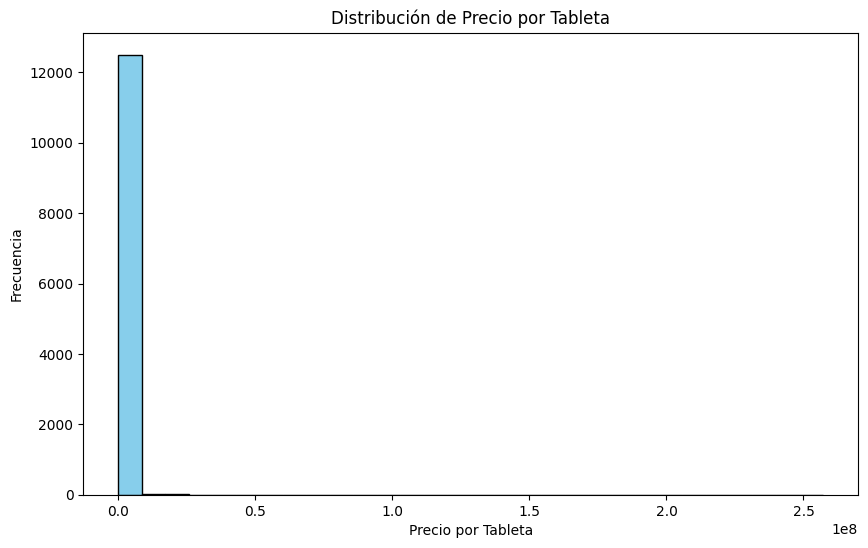

In [43]:
import matplotlib.pyplot as plt

# Crear histograma de 'precio_por_tableta'
# Este bloque de código genera un histograma para visualizar la distribución de los precios por tableta en el dataset final.

write_to_log("Generando el histograma de 'precio_por_tableta' en el dataset final.")
plt.figure(figsize=(10, 6))  # Definir el tamaño de la figura
plt.hist(df_final['precio_por_tableta'], bins=30, color='skyblue', edgecolor='black')  # Crear el histograma
plt.title('Distribución de Precio por Tableta')  # Título del histograma
plt.xlabel('Precio por Tableta')  # Etiqueta en el eje X
plt.ylabel('Frecuencia')  # Etiqueta en el eje Y
plt.show()  # Mostrar el histograma




En este bloque de código, generamos un **boxplot** para visualizar la distribución de los valores en la columna **`'precio_por_tableta'`** del **dataset final** (**`df_final`**). El boxplot es útil para identificar la **mediana**, los **cuartiles**, y los **outliers** en los datos. con el fin de vizualizar los outliers o valores atipicos.


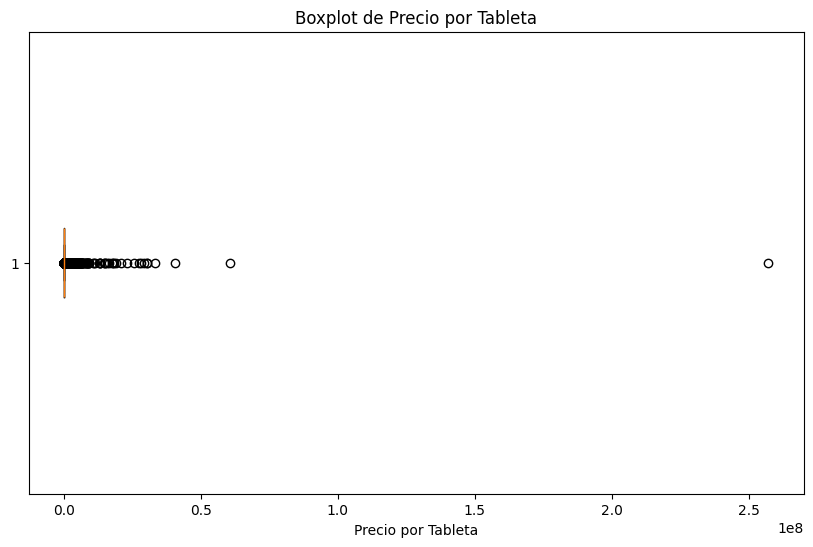

In [44]:
import matplotlib.pyplot as plt

# Crear boxplot de 'precio_por_tableta'
# Este bloque de código genera un boxplot para visualizar la distribución y los outliers de los precios por tableta en el dataset final.

write_to_log("Generando el boxplot de 'precio_por_tableta' en el dataset final.")
plt.figure(figsize=(10, 6))  # Definir el tamaño de la figura
plt.boxplot(df_final['precio_por_tableta'], vert=False)  # Crear el boxplot
plt.title('Boxplot de Precio por Tableta')  # Título del boxplot
plt.xlabel('Precio por Tableta')  # Etiqueta en el eje X
plt.show()  # Mostrar el boxplot


En este bloque de código, eliminamos los **outliers** de la columna **`'precio_por_tableta'`** utilizando el rango **IQR** previamente calculado. Los outliers son valores que caen fuera de los límites inferiores y superiores definidos por el **IQR**.

- Se filtran las filas en **`df_final`** para mantener solo aquellas cuyo valor de **`'precio_por_tableta'`** esté dentro de los límites calculados.
- Después de eliminar los outliers, se verifica la cantidad de registros restantes en el dataset.


In [45]:
# Eliminar outliers usando el rango IQR
# Este bloque de código elimina los outliers en la columna 'precio_por_tableta' utilizando el rango IQR previamente calculado.

write_to_log("Eliminando outliers utilizando el rango IQR en el dataset final.")
df_cleaned = df_final[(df_final['precio_por_tableta'] >= lower_limit) & (df_final['precio_por_tableta'] <= upper_limit)]

# Verificar el número de registros después de eliminar los outliers
# Comprobamos cuántos registros quedan después de eliminar los outliers.

write_to_log(f"Cantidad de registros después de eliminar los outliers: {df_cleaned.shape[0]}")
print(f"Cantidad de registros después de eliminar los outliers: {df_cleaned.shape[0]}")



Cantidad de registros después de eliminar los outliers: 10534


En este bloque de código, generamos dos **histogramas** para visualizar la **distribución de los precios por tableta** en el dataset antes y después de eliminar los outliers.

1. **Histograma antes de eliminar outliers**:
   - Este histograma muestra la distribución de los valores de **`'precio_por_tableta'`** en el **dataset original** (antes de la eliminación de los outliers).

2. **Histograma después de eliminar outliers**:
   - Este histograma muestra cómo cambia la distribución de los precios después de eliminar los outliers.

Ambos histogramas permiten visualizar cómo los outliers afectan la distribución de los datos y cómo se modifican una vez que se eliminan.


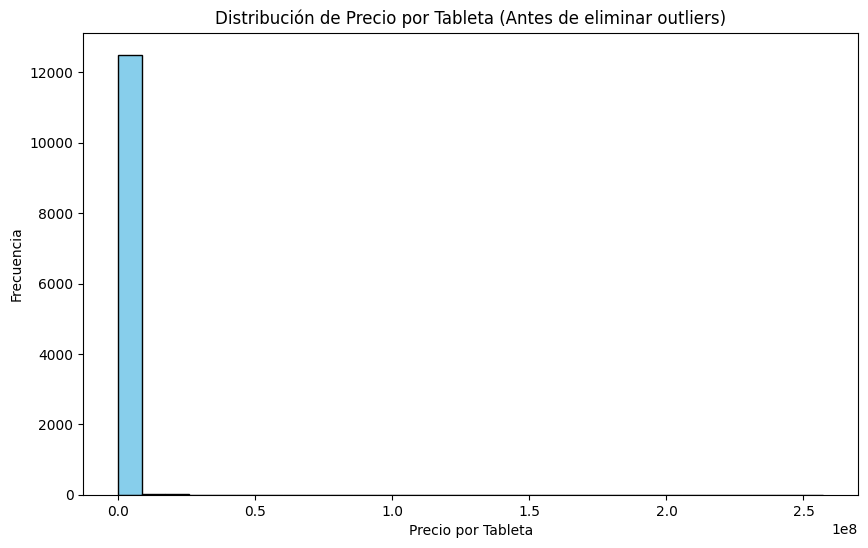

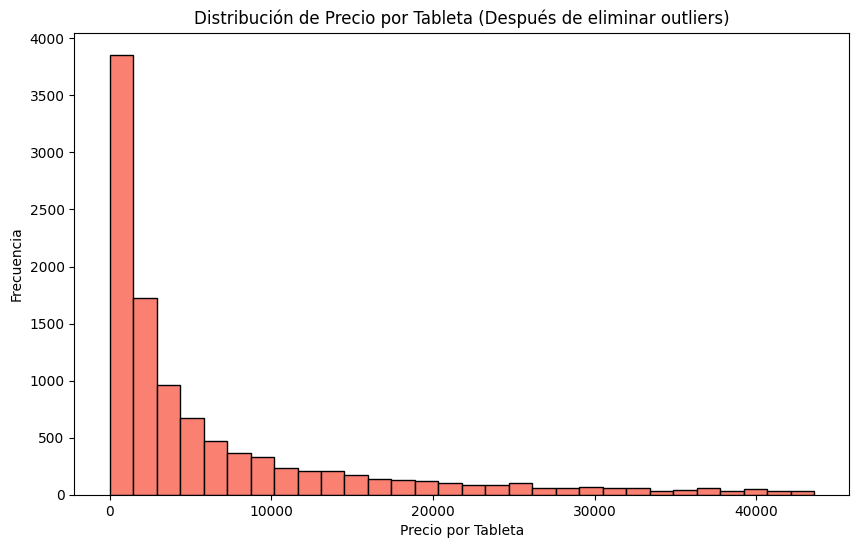

In [46]:
import matplotlib.pyplot as plt

# Histograma antes de eliminar outliers
# Este bloque de código genera el histograma de la columna 'precio_por_tableta' antes de eliminar los outliers.

write_to_log("Generando el histograma de 'precio_por_tableta' antes de eliminar los outliers.")
plt.figure(figsize=(10, 6))
plt.hist(df_final['precio_por_tableta'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de Precio por Tableta (Antes de eliminar outliers)')
plt.xlabel('Precio por Tableta')
plt.ylabel('Frecuencia')
plt.show()

# Histograma después de eliminar outliers
# Este bloque de código genera el histograma de la columna 'precio_por_tableta' después de eliminar los outliers.

write_to_log("Generando el histograma de 'precio_por_tableta' después de eliminar los outliers.")
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['precio_por_tableta'], bins=30, color='salmon', edgecolor='black')
plt.title('Distribución de Precio por Tableta (Después de eliminar outliers)')
plt.xlabel('Precio por Tableta')
plt.ylabel('Frecuencia')
plt.show()



En este bloque de código, verificamos si existen valores nulos (**NaN**) en las columnas del **dataset limpio** (**`df_cleaned`**). Después de eliminar los outliers, es importante asegurarse de que no queden valores nulos que puedan afectar el análisis posterior.


In [47]:
# Verificar si hay valores nulos en el dataset limpio
# Este bloque de código verifica si existen valores nulos (NaN) en cualquier columna del dataset limpio.

write_to_log("Verificando si hay valores nulos en el dataset limpio.")
print(df_cleaned.isnull().sum())


principio_activo          0
unidad_de_dispensacion    0
concentracion             0
unidad_base               0
nombre_comercial          0
fabricante                0
precio_por_tableta        0
factoresprecio            0
numerofactor_df1          0
numerofactor_df15         0
Expediente_INVIMA         0
medicamento               0
canal                     0
numerofactor              0
dtype: int64


En este bloque de código, verificamos si existen filas duplicadas en el **dataset limpio** (**`df_cleaned`**).

In [48]:
# Verificar si hay duplicados en el dataset limpio
# Este bloque de código verifica si existen filas duplicadas en el dataset limpio.

write_to_log("Verificando si hay duplicados en el dataset limpio.")
print(df_cleaned.duplicated().sum())


0


En este bloque de código, generamos un **boxplot** para visualizar la distribución de la columna **`'precio_por_tableta'`** del **dataset limpio** (**`df_cleaned`**). Con el fin de rectificar si hubo cambios en cuanto a la reduccion de outliers.


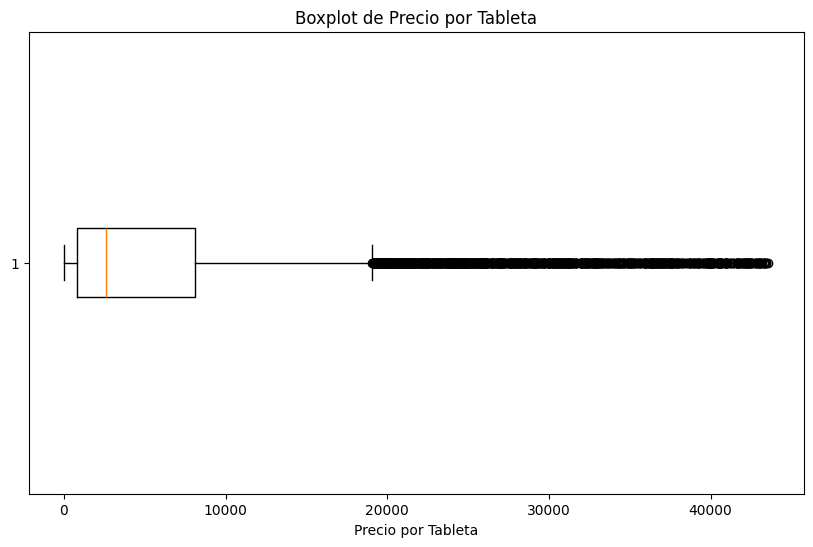

In [49]:
import matplotlib.pyplot as plt

# Crear boxplot de 'precio_por_tableta'
# Este bloque de código genera un boxplot para visualizar la distribución y los outliers de los precios por tableta en el dataset limpio.

write_to_log("Generando el boxplot de 'precio_por_tableta' en el dataset limpio.")
plt.figure(figsize=(10, 6))  # Definir el tamaño de la figura
plt.boxplot(df_cleaned['precio_por_tableta'], vert=False)  # Crear el boxplot
plt.title('Boxplot de Precio por Tableta')  # Título del boxplot
plt.xlabel('Precio por Tableta')  # Etiqueta en el eje X
plt.show()  # Mostrar el boxplot


En este bloque de código, verificamos los **tipos de datos** de las columnas en el **dataset limpio** (**`df_cleaned`**) después de todas las transformaciones realizadas.

In [50]:
# Verificar los tipos de datos después de la conversión
# Este bloque de código verifica los tipos de datos de las columnas en el dataset limpio después de todas las transformaciones.

write_to_log("Verificando los tipos de datos en el dataset limpio después de la conversión.")
print(df_cleaned.dtypes)


principio_activo           object
unidad_de_dispensacion     object
concentracion              object
unidad_base                object
nombre_comercial           object
fabricante                 object
precio_por_tableta        float64
factoresprecio             object
numerofactor_df1            int64
numerofactor_df15           int64
Expediente_INVIMA           int64
medicamento                object
canal                      object
numerofactor                int64
dtype: object


### Carga de datos a la base de datos

En este bloque de código, preparamos los datos para cargar los registros limpios a la base de datos SQLite. Esto incluye la conversión de las columnas al tipo de dato adecuado (texto o numérico), lo que garantiza que los datos se almacenen correctamente en la base de datos.

1. **Conversión de columnas de texto a tipo `str`**: Utilizamos **`astype(str)`** para convertir las columnas de texto a tipo cadena de caracteres (`str`). Esto asegura que las columnas como **`'principio_activo'`**, **`'unidad_de_dispensacion'`**, **`'concentracion'`**, etc., se almacenarán como cadenas de texto en la base de datos.
   
2. **Conversión de columnas numéricas a tipo adecuado**: Utilizamos **`pd.to_numeric()`** para convertir las columnas numéricas (como **`'precio_por_tableta'`**, **`'numerofactor'`**, etc.) a tipos numéricos adecuados, como **`float64`** o **`int64`**.

3. **Verificación de los tipos de datos**: Después de las conversiones, verificamos que las columnas tengan los tipos correctos utilizando **`df_cleaned.dtypes`**.


In [51]:
# Preparar los datos para cargar los datos limpios a la base de datos SQLite
# Convertir las columnas de texto a tipo str utilizando .loc

write_to_log("Convirtiendo las columnas de texto a tipo str en el dataset limpio.")
df_cleaned.loc[:, 'principio_activo'] = df_cleaned['principio_activo'].astype(str)
df_cleaned.loc[:, 'unidad_de_dispensacion'] = df_cleaned['unidad_de_dispensacion'].astype(str)
df_cleaned.loc[:, 'concentracion'] = df_cleaned['concentracion'].astype(str)
df_cleaned.loc[:, 'nombre_comercial'] = df_cleaned['nombre_comercial'].astype(str)
df_cleaned.loc[:, 'fabricante'] = df_cleaned['fabricante'].astype(str)
df_cleaned.loc[:, 'factoresprecio'] = df_cleaned['factoresprecio'].astype(str)
df_cleaned.loc[:, 'medicamento'] = df_cleaned['medicamento'].astype(str)
df_cleaned.loc[:, 'canal'] = df_cleaned['canal'].astype(str)

# Convertir las columnas numéricas a tipo float64 o int64
write_to_log("Convirtiendo las columnas numéricas a tipo float64 o int64 en el dataset limpio.")
df_cleaned.loc[:, 'precio_por_tableta'] = pd.to_numeric(df_cleaned['precio_por_tableta'], errors='coerce')
df_cleaned.loc[:, 'numerofactor'] = pd.to_numeric(df_cleaned['numerofactor'], errors='coerce')
df_cleaned.loc[:, 'numerofactor_df1'] = pd.to_numeric(df_cleaned['numerofactor_df1'], errors='coerce')
df_cleaned.loc[:, 'numerofactor_df15'] = pd.to_numeric(df_cleaned['numerofactor_df15'], errors='coerce')
df_cleaned.loc[:, 'Expediente_INVIMA'] = pd.to_numeric(df_cleaned['Expediente_INVIMA'], errors='coerce')

# Verificar los tipos de datos después de la conversión
write_to_log("Verificando los tipos de datos después de la conversión en el dataset limpio.")
print(df_cleaned.dtypes)



principio_activo           object
unidad_de_dispensacion     object
concentracion              object
unidad_base                object
nombre_comercial           object
fabricante                 object
precio_por_tableta        float64
factoresprecio             object
numerofactor_df1            int64
numerofactor_df15           int64
Expediente_INVIMA           int64
medicamento                object
canal                      object
numerofactor                int64
dtype: object


En este bloque de código, conectamos a la base de datos SQLite **`medicamentos.db`** y cargamos los datos limpios (**`df_cleaned`**) en una tabla llamada **`precios`**.

1. **Conexión a la base de datos**:
   - Utilizamos **`sqlite3.connect()`** para conectarnos a la base de datos **`medicamentos.db`**. Si la base de datos no existe, SQLite la crea automáticamente.
   
2. **Creación de la tabla**:
   - Si la tabla **`precios`** no existe, se crea utilizando **`CREATE TABLE IF NOT EXISTS`**. Esta tabla almacenará todos los datos limpios.
   
3. **Conversión de los datos a tuplas**:
   - Convertimos el **DataFrame** **`df_cleaned`** en una lista de tuplas para poder insertar los datos en la base de datos.
   
4. **Inserción de los datos**:
   - Usamos **`cursor.executemany()`** para insertar todas las filas de una vez en la tabla **`precios`**.
   
5. **Guardar y cerrar**:
   - Finalmente, **`conn.commit()`** guarda los cambios en la base de datos y **`conn.close()`** cierra la conexión.



In [52]:
import sqlite3

# Conectar a la base de datos SQLite (se creará si no existe)
# Este bloque de código se conecta a la base de datos SQLite y crea la tabla si no existe.

write_to_log("Conectando a la base de datos SQLite y creando la tabla 'precios' si no existe.")
conn = sqlite3.connect('medicamentos.db')
cursor = conn.cursor()

# Crear la tabla 'precios' si no existe
# Si la tabla ya existe, no hace nada. Se utiliza para almacenar los datos limpios.

cursor.execute('''
CREATE TABLE IF NOT EXISTS precios (
    id INTEGER PRIMARY KEY,
    principio_activo TEXT,
    unidad_de_dispensacion TEXT,
    concentracion TEXT,
    unidad_base TEXT,
    nombre_comercial TEXT,
    fabricante TEXT,
    precio_por_tableta REAL,
    factoresprecio TEXT,
    numerofactor_df1 INTEGER,
    numerofactor_df15 INTEGER,
    Expediente_INVIMA INTEGER,
    medicamento TEXT,
    canal TEXT,
    numerofactor INTEGER
)
''')

# Convertir el DataFrame 'df_cleaned' en una lista de tuplas
# Convierte las filas del DataFrame limpio en tuplas para poder insertarlas en la base de datos.

write_to_log("Convirtiendo el DataFrame 'df_cleaned' en una lista de tuplas para la inserción.")
df_tuples = [tuple(x) for x in df_cleaned.values]

# Insertar los datos en la tabla 'precios'
# Usamos 'executemany' para insertar todas las filas de una vez.

write_to_log("Insertando los datos limpios en la tabla 'precios'.")
cursor.executemany('''
INSERT INTO precios (principio_activo, unidad_de_dispensacion, concentracion,
                     unidad_base, nombre_comercial, fabricante, precio_por_tableta,
                     factoresprecio, numerofactor_df1,
                     numerofactor_df15, Expediente_INVIMA, medicamento, canal, numerofactor)
VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
''', df_tuples)

# Guardar los cambios y cerrar la conexión
# Guardamos los cambios realizados en la base de datos y cerramos la conexión.

write_to_log("Guardando los cambios en la base de datos y cerrando la conexión.")
conn.commit()
conn.close()

print("Datos cargados en la base de datos con éxito.")



Datos cargados en la base de datos con éxito.


En este bloque de código, nos conectamos a la base de datos SQLite **`medicamentos.db`** y obtenemos los primeros 5 registros completos de la tabla **`precios`**.

1. **Conexión a la base de datos**:
   - Usamos **`sqlite3.connect('medicamentos.db')`** para conectarnos a la base de datos **`medicamentos.db`**.
   
2. **Consulta SQL**:
   - La consulta SQL **`SELECT * FROM precios LIMIT 5`** se utiliza para seleccionar los primeros 5 registros de la tabla **`precios`**.


In [53]:
# Conectar a la base de datos SQLite y obtener los primeros 5 registros completos
# Este bloque de código se conecta a la base de datos SQLite y obtiene los primeros 5 registros de la tabla 'precios'.

write_to_log("Conectando a la base de datos SQLite y obteniendo los primeros 5 registros de la tabla 'precios'.")
conn = sqlite3.connect('medicamentos.db')
query = '''
SELECT * FROM precios
LIMIT 5
'''

# Ejecutar la consulta SQL y cargar los datos en un DataFrame
df_first_5_records = pd.read_sql_query(query, conn)

# Cerrar la conexión a la base de datos
conn.close()

# Mostrar el resultado
print(df_first_5_records)


   id       principio_activo unidad_de_dispensacion  \
0   1               Abacavir                 Frasco   
1   2               Abacavir                Tableta   
2   3  Abacavir + Lamivudina                Tableta   
3   4  Abacavir Y Lamivudina                Tableta   
4   5  Abacavir Y Lamivudina                Tableta   

                         concentracion unidad_base       nombre_comercial  \
0                         Abacavir 2 g          ml                 Abacar   
1                      Abacavir 300 mg          mg               Abacavir   
2  Lamivudina 300 mg + Abacavir 600 mg          mg                Diviral   
3  Lamivudina 300 mg + Abacavir 600 mg          mg  Abacavir Y Lamivudina   
4  Lamivudina 300 mg + Abacavir 600 mg          mg                 Abalam   

    fabricante  precio_por_tableta factoresprecio  numerofactor_df1  \
0  Hetero Labs        41407.547170          Medio                 2   
1      Legrand          696.244131          Medio               

###Analisis y visualizacion de los datos

En este bloque de código, nos conectamos a la base de datos **`medicamentos.db`** y obtenemos el **precio promedio** de los medicamentos, agrupados por **`nombre_comercial`**. Posteriormente,
mostramos los 10 medicamentos con los precios más altos.


In [54]:
# Conectar a la base de datos SQLite y obtener el precio promedio de los primeros 10 medicamentos más caros
# Este bloque de código se conecta a la base de datos SQLite y ejecuta una consulta para obtener el precio promedio por medicamento.

write_to_log("Conectando a la base de datos SQLite y obteniendo el precio promedio de los medicamentos.")
conn = sqlite3.connect('medicamentos.db')
query = '''
SELECT nombre_comercial, AVG(precio_por_tableta) AS precio_promedio
FROM precios
GROUP BY nombre_comercial
ORDER BY precio_promedio DESC
LIMIT 10
'''

# Ejecutar la consulta SQL y cargar los datos en un DataFrame
df_avg_price = pd.read_sql_query(query, conn)

# Cerrar la conexión a la base de datos
conn.close()

# Mostrar el resultado
print(df_avg_price)



           nombre_comercial  precio_promedio
0                  Zebesten      43569.25346
1                   Biovisc      43359.07336
2  Doxorubicina Clorhidrato      43309.65137
3                Budek Plus      43282.17219
4                Lotinercan      43083.33333
5               Dilozeld-Uf      43000.00000
6                   Vosicaz      42981.48148
7                    Leaxin      42896.79961
8                    Daresp      42867.46988
9                 Caverject      42830.43863


En este bloque de código, nos conectamos a la base de datos **`medicamentos.db`** y obtenemos el **precio máximo** de cada **`nombre_comercial`**. Posteriormente, mostramos los 10 medicamentos con los precios más altos.


In [55]:
# Conectar a la base de datos SQLite y obtener el precio máximo de los primeros 10 medicamentos más caros
# Este bloque de código se conecta a la base de datos SQLite y ejecuta una consulta para obtener el precio máximo por medicamento.

write_to_log("Conectando a la base de datos SQLite y obteniendo el precio máximo de los medicamentos.")
conn = sqlite3.connect('medicamentos.db')
query = '''
SELECT nombre_comercial, MAX(precio_por_tableta) AS precio_maximo
FROM precios
GROUP BY nombre_comercial
ORDER BY precio_maximo DESC
LIMIT 10
'''

# Ejecutar la consulta SQL y cargar los datos en un DataFrame
df_max_price = pd.read_sql_query(query, conn)

# Cerrar la conexión a la base de datos
conn.close()

# Mostrar el resultado
print(df_max_price)



           nombre_comercial  precio_maximo
0                  Zebesten    43569.25346
1                     Cipro    43448.59957
2                 Nordixate    43426.00000
3                   Biovisc    43359.07336
4  Doxorubicina Clorhidrato    43309.65137
5               Duodecadron    43301.87247
6                Budek Plus    43282.17219
7                Ifosfamida    43148.00000
8                  Metarsal    43085.52692
9                Lotinercan    43083.33333


En este bloque de código, nos conectamos a la base de datos **`medicamentos.db`** y obtenemos el **precio promedio** por **canal**. Posteriormente, mostramos los resultados ordenados por el precio promedio de mayor a menor.


In [56]:
# Conectar a la base de datos SQLite y obtener el precio promedio por canal
# Este bloque de código se conecta a la base de datos SQLite y ejecuta una consulta para obtener el precio promedio por canal.

write_to_log("Conectando a la base de datos SQLite y obteniendo el precio promedio por canal.")
conn = sqlite3.connect('medicamentos.db')
query = '''
SELECT canal, AVG(precio_por_tableta) AS precio_promedio
FROM precios
GROUP BY canal
ORDER BY precio_promedio DESC
'''

# Ejecutar la consulta SQL y cargar los datos en un DataFrame
df_avg_price_canal = pd.read_sql_query(query, conn)

# Cerrar la conexión a la base de datos
conn.close()

# Mostrar el resultado
print(df_avg_price_canal)



           canal  precio_promedio
0      Comercial      6926.243028
1  Institucional      5792.794659


En este bloque de código, nos conectamos a la base de datos **`medicamentos.db`** y obtenemos los precios de los medicamentos almacenados en la columna **`precio_por_tableta`** de la tabla **`precios`**. Luego, visualizamos un **histograma** para observar la distribución de los precios.


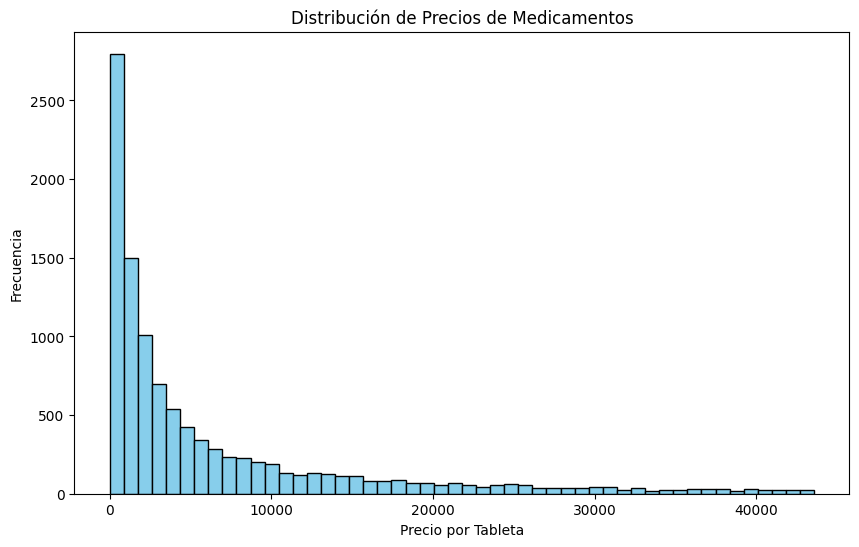

In [57]:
import matplotlib.pyplot as plt

# Conectar a SQLite y obtener los datos directamente como un DataFrame
# Este bloque de código se conecta a la base de datos SQLite y obtiene los precios de los medicamentos.

write_to_log("Conectando a la base de datos SQLite y obteniendo los precios de los medicamentos.")
conn = sqlite3.connect('medicamentos.db')
df = pd.read_sql_query('SELECT precio_por_tableta FROM precios', conn)
conn.close()

# Visualización del histograma de precios
# Este bloque de código crea un histograma para visualizar la distribución de los precios de los medicamentos.

write_to_log("Generando el histograma de los precios de medicamentos.")
df['precio_por_tableta'].plot(kind='hist', bins=50, color='skyblue', edgecolor='black', figsize=(10, 6))
plt.title('Distribución de Precios de Medicamentos')
plt.xlabel('Precio por Tableta')
plt.ylabel('Frecuencia')
plt.show()



En este bloque de código, generamos un **gráfico de barras** para visualizar el **precio promedio** por **canal** de distribucion. El gráfico muestra cómo se distribuyen los precios entre los diferentes canales de venta (por ejemplo, institucional vs. comercial).


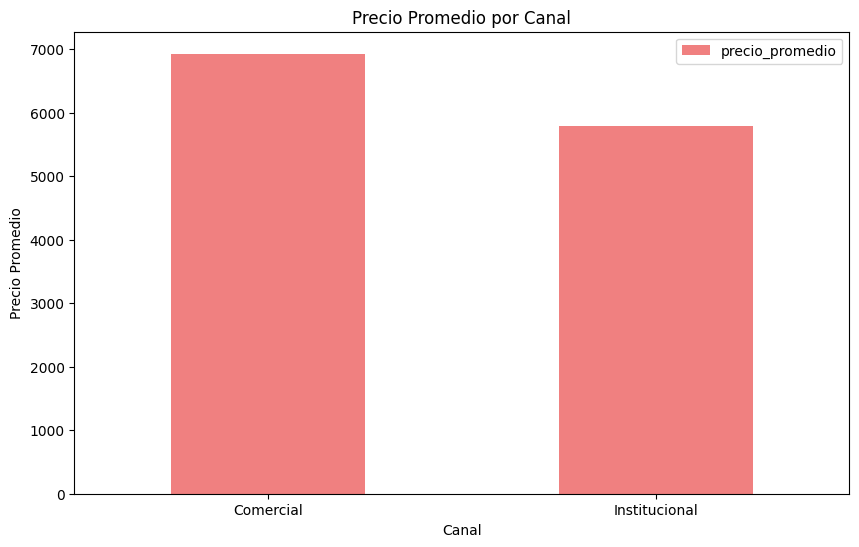

In [ ]:
# Visualización del gráfico de barras de precio promedio por canal
# Este bloque de código genera un gráfico de barras para mostrar el precio promedio por canal de distribucion.

write_to_log("Generando el gráfico de barras del precio promedio por canal.")
df_avg_price_canal.plot(kind='bar', x='canal', y='precio_promedio', color='lightcoral', figsize=(10, 6))

# Configuración del gráfico
plt.title('Precio Promedio por Canal')  # Título del gráfico
plt.xlabel('Canal')  # Etiqueta del eje X
plt.ylabel('Precio Promedio')  # Etiqueta del eje Y
plt.xticks(rotation=0)  # Alineación de las etiquetas del eje X
plt.show()  # Mostrar el gráfico

